# Logistic Regression using Pytorch

### Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, Dataset

### Data Preprocessing

In [5]:
df = pd.read_csv('data/train.csv')
df.head()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


In [6]:
df.shape

(200000, 202)

In [7]:
df.drop('ID_code', axis=1, inplace=True)

In [8]:
df['target'].value_counts()

0    179902
1     20098
Name: target, dtype: int64

* 0 & 1 - Identify will the customers make a specific transaction in the future or not

<BarContainer object of 2 artists>

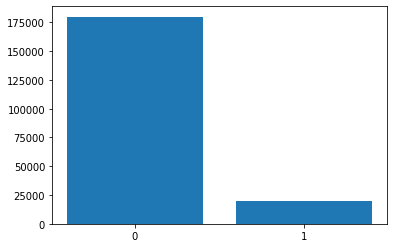

In [9]:
fig, ax = plt.subplots()
ax.bar(['0', '1'], height= np.array(df['target'].value_counts()))

In [10]:
(df.isna().sum() == 0).sum()

201

In [11]:
df.iloc[:, 1:]

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,-4.9200,5.7470,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,3.1468,8.0851,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,-4.9193,5.9525,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,-5.8609,8.2450,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,6.2654,7.6784,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,11.4880,-0.4956,8.2622,3.5142,10.3404,11.6081,5.6709,15.1516,-0.6209,5.6669,...,6.1415,13.2305,3.9901,0.9388,18.0249,-1.7939,2.1661,8.5326,16.6660,-17.8661
199996,4.9149,-2.4484,16.7052,6.6345,8.3096,-10.5628,5.8802,21.5940,-3.6797,6.0019,...,4.9611,4.6549,0.6998,1.8341,22.2717,1.7337,-2.1651,6.7419,15.9054,0.3388
199997,11.2232,-5.0518,10.5127,5.6456,9.3410,-5.4086,4.5555,21.5571,0.1202,6.1629,...,4.0651,5.4414,3.1032,4.8793,23.5311,-1.5736,1.2832,8.7155,13.8329,4.1995
199998,9.7148,-8.6098,13.6104,5.7930,12.5173,0.5339,6.0479,17.0152,-2.1926,8.7542,...,2.6840,8.6587,2.7337,11.1178,20.4158,-0.0786,6.7980,10.0342,15.5289,-13.9001


#### Normalizing the dataset for neutral network

In [12]:
def normalize(df, skip_flds=None):
    for col in df.columns:
        if col == skip_flds:
            continue
        else:
            mean, std = df[col].mean(), df[col].std()
            df[col] = (df[col] - mean)/(1e-7 + std)
    return df    

In [13]:
df = normalize(df,skip_flds='target')

In [14]:
df.describe()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,...,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05
mean,0.100490,-4.955295e-14,-1.848151e-15,-2.763518e-14,-8.757870e-15,-7.285757e-14,-4.036039e-15,4.808608e-14,-3.160777e-14,1.141323e-15,...,7.719343e-15,-1.449932e-14,-2.060941e-14,-5.310298e-15,2.591193e-15,3.540945e-15,-3.412070e-15,1.079554e-14,-1.733072e-13,-1.612577e-16
std,0.300653,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,9.999999e-01,1.000000e+00,9.999999e-01,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,9.999999e-01,1.000000e+00,1.000000e+00,9.999999e-01,1.000000e+00,9.999999e-01,1.000000e+00,1.000000e+00
min,0.000000,-3.378731e+00,-3.312502e+00,-3.255750e+00,-3.345894e+00,-3.698694e+00,-3.496929e+00,-3.532913e+00,-3.275571e+00,-3.237578e+00,...,-3.800008e+00,-3.350710e+00,-3.884097e+00,-3.786337e+00,-2.966157e+00,-3.581230e+00,-3.027469e+00,-3.198216e+00,-3.178875e+00,-3.403546e+00
25%,0.000000,-7.322457e-01,-7.684862e-01,-7.545614e-01,-7.548768e-01,-7.363204e-01,-7.802142e-01,-7.399530e-01,-7.612616e-01,-7.807524e-01,...,-7.222196e-01,-7.544834e-01,-7.021424e-01,-6.881645e-01,-7.540230e-01,-7.196246e-01,-7.792395e-01,-7.110889e-01,-6.778669e-01,-7.551185e-01
50%,0.000000,-5.104002e-02,4.832463e-03,-5.119169e-02,1.393363e-02,1.843130e-02,2.952558e-02,-2.751959e-02,-2.605264e-02,3.286834e-02,...,-6.763225e-03,-2.998683e-02,-1.795056e-02,1.617631e-02,-1.142977e-02,-2.141609e-02,1.935416e-02,-2.165487e-02,2.103318e-02,4.857120e-02
75%,0.000000,6.836352e-01,7.373368e-01,6.821584e-01,7.475929e-01,7.287016e-01,7.617848e-01,6.854907e-01,7.480964e-01,7.962886e-01,...,6.955734e-01,6.860503e-01,6.910482e-01,7.199410e-01,7.663849e-01,6.798007e-01,7.798133e-01,7.434064e-01,7.286763e-01,7.820775e-01
max,1.000000,3.169383e+00,2.964022e+00,3.270789e+00,3.128131e+00,3.445811e+00,2.838123e+00,3.506491e+00,3.260885e+00,2.960763e+00,...,3.334807e+00,3.068891e+00,4.379370e+00,3.744968e+00,3.168900e+00,3.088760e+00,2.936758e+00,3.355205e+00,3.390423e+00,3.049166e+00


#### Spliting the dataset

In [72]:
idxs = np.random.permutation(len(df))
train_idxs, val_idxs = idxs[:160000], idxs[160000:]

In [76]:
train_df = df.iloc[train_idxs]
valid_df = df.iloc[val_idxs]

In [79]:
train_df['target'].value_counts()

0    143954
1     16046
Name: target, dtype: int64

In [80]:
valid_df['target'].value_counts()

0    35948
1     4052
Name: target, dtype: int64

Text(0.5, 1.0, 'Validation')

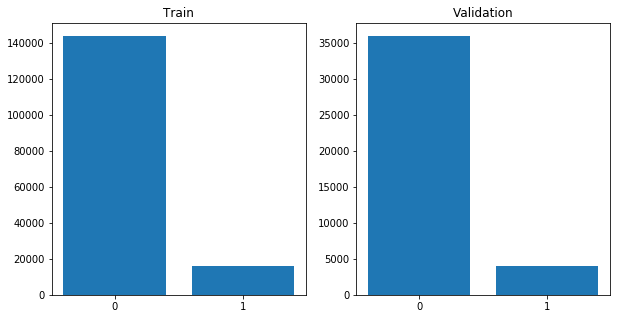

In [46]:
fig, axs = plt.subplots(1, 2, figsize=(10,5))
axs[0].bar(['0', '1'], height= np.array(train_df['target'].value_counts()))
axs[0].set_title('Train')
axs[1].bar(['0', '1'], height= np.array(valid_df['target'].value_counts()))
axs[1].set_title('Validation')

In [118]:
train_df.to_csv('processed/train.csv', index=False)
valid_df.to_csv('processed/valid.csv', index=False)

### Dataset

* creating dataset class
* WeightedRandomSampling train dataset for balanced training
* creating Dataloader

In [113]:
class transactionDataset(Dataset):
    
    def __init__(self, dep_var=None, valid=False):
        if valid:
            self.df = pd.read_csv('processed/valid.csv')
        else:
            self.df = pd.read_csv('processed/train.csv')
        self.dep_var = dep_var
        self.classes = self.df[self.dep_var].unique()
        self.X = torch.tensor(self.df.drop(self.dep_var, axis=1).values, dtype=torch.float32)
        self.y = torch.tensor(self.df[self.dep_var].values, dtype=torch.float32)
        
    
    def __len__(self):
        return len(self.df)
    
    def __getitem__(self, index):
        return self.X[index], self.y[index]

In [114]:
train = transactionDataset(dep_var='target')
valid = transactionDataset(dep_var='target', valid=True)

#### Weighted Random Sampler
Since we have Imbalanced dataset, we need to Oversample the dataset while taking each batch for training.
<br>We are doing WeightedRandomSampling on train dataset.

WeightedRandomSampler is used to ensure that each batch sees a proportional number of all classes.
1. Get all the target labels.
2. Get the counts of each target labels.
3. Get the weights. Weights are the inversely reciprocal of the number of items per class.
    - weights = (1/counts)[target_labels]
4. Obtain total length of oversample.
    - total_len_oversample = no_of_classes * max(counts)
5. Provide weights and total_len_oversample to the WeightedRandomSampler


In [115]:
from torch.utils.data.sampler import WeightedRandomSampler

train_labels = train.df['target'].values
_ , counts = np.unique(train_labels,return_counts=True)
weights = torch.DoubleTensor((1/counts)[train_labels])
total_len_oversample = int(train.df['target'].nunique()*np.max(counts))
sampler = WeightedRandomSampler(weights, total_len_oversample)

In [116]:
trainset = DataLoader(train, batch_size=64, sampler=sampler)
validset = DataLoader(valid, batch_size=64)

### Model

* creating model class 
* defining the training loop
* Testing the model

In [224]:
class LogisticRegressionNN(nn.Module):
    
    def __init__(self, n_input, n_out):
        super(LogisticRegressionNN, self).__init__()
        self.linear = nn.Linear(n_input, n_out)
    
    def forward(self, x):
        x = self.linear(x)
        return torch.sigmoid(x)
    
model = LogisticRegressionNN(200, 1)

In [225]:
class model_learner():
    def fit(self, model, trainset, validset, lr, epochs):
        
        train_loss = []
        valid_loss = []
        roc_auc = []
        criterion = nn.BCELoss()
        optimizer = torch.optim.SGD(model.parameters(),lr=lr)

        for epoch in range(epochs):
            for X, y in trainset:
                ## Forward pass and loss 
                output = model(X)
                loss = criterion(output, y.view(-1, 1))
                ## backward pass (backpropagation)
                loss.backward()
                ## Update the weights and zero_grad
                optimizer.step()
                optimizer.zero_grad()
            ## append loss
            train_loss.append(loss)

            with torch.no_grad():
                val_loss = []
                for X_val, y_val in validset:
                    preds = model(X_val)
                    loss = criterion(preds, y_val.view(-1, 1))
                    val_loss.append(loss)

                valid_loss.append(torch.stack(val_loss).mean())
            print(f'Epoch : {epoch} | Train Loss: {train_loss[epoch]:.4f} | Validation Loss: {valid_loss[epoch]:.4f}')


In [226]:
learn = model_learner()
learn.fit(model, trainset, validset, 1e-3, 20)

Epoch : 0 | Train Loss: 0.5138 | Validation Loss: 0.5910
Epoch : 1 | Train Loss: 0.3592 | Validation Loss: 0.5391
Epoch : 2 | Train Loss: 0.5056 | Validation Loss: 0.5093
Epoch : 3 | Train Loss: 0.5343 | Validation Loss: 0.4938
Epoch : 4 | Train Loss: 0.3909 | Validation Loss: 0.4835
Epoch : 5 | Train Loss: 0.3996 | Validation Loss: 0.4772
Epoch : 6 | Train Loss: 0.4854 | Validation Loss: 0.4735
Epoch : 7 | Train Loss: 0.3122 | Validation Loss: 0.4712
Epoch : 8 | Train Loss: 0.4243 | Validation Loss: 0.4686
Epoch : 9 | Train Loss: 0.7317 | Validation Loss: 0.4670
Epoch : 10 | Train Loss: 0.4804 | Validation Loss: 0.4669
Epoch : 11 | Train Loss: 0.3504 | Validation Loss: 0.4640
Epoch : 12 | Train Loss: 0.5818 | Validation Loss: 0.4646
Epoch : 13 | Train Loss: 0.5941 | Validation Loss: 0.4648
Epoch : 14 | Train Loss: 0.5646 | Validation Loss: 0.4637
Epoch : 15 | Train Loss: 0.4289 | Validation Loss: 0.4634
Epoch : 16 | Train Loss: 0.4468 | Validation Loss: 0.4631
Epoch : 17 | Train Loss:

### Validating the model
* Area Under the ROC is used

In [228]:
valid_data = valid.df
X_valid, y_valid = valid_data.drop('target', axis=1), valid_data['target']

In [229]:
X_val = torch.tensor(X_valid.values, dtype=torch.float32)
with torch.no_grad():
    preds = model(X_val)

In [230]:
from sklearn.metrics import roc_auc_score

y_predicted_cls = preds.round().view(-1)
roc_auc_score(y_valid, y_predicted_cls)

0.7806234265552601